In [67]:
import numpy as np 
import pandas as pd 
import math
import cv2
import matplotlib.pyplot as plt
import os
import seaborn as sns
import umap
from PIL import Image
from scipy import misc
from os import listdir
from os.path import isfile, join
import numpy as np
from scipy import misc
from random import shuffle
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical

In [68]:
os.chdir('utkface_aligned_cropped') #dataset utk face den alındı.

FileNotFoundError: [WinError 2] Sistem belirtilen dosyayı bulamıyor: 'utkface_aligned_cropped'

In [69]:
os.listdir()

['100_1_0_20170110183726390.jpg.chip.jpg',
 '100_1_2_20170105174847679.jpg.chip.jpg',
 '101_1_2_20170105174739309.jpg.chip.jpg',
 '10_0_0_20161220222308131.jpg.chip.jpg',
 '10_0_0_20170103200329407.jpg.chip.jpg',
 '10_0_0_20170103200522151.jpg.chip.jpg',
 '10_0_0_20170103233459275.jpg.chip.jpg',
 '10_0_0_20170104013211746.jpg.chip.jpg',
 '10_0_0_20170110215927291.jpg.chip.jpg',
 '10_0_0_20170110220033115.jpg.chip.jpg',
 '10_0_0_20170110220111082.jpg.chip.jpg',
 '10_0_0_20170110220235233.jpg.chip.jpg',
 '10_0_0_20170110220251986.jpg.chip.jpg',
 '10_0_0_20170110220255346.jpg.chip.jpg',
 '10_0_0_20170110220316298.jpg.chip.jpg',
 '10_0_0_20170110220403810.jpg.chip.jpg',
 '10_0_0_20170110220447314.jpg.chip.jpg',
 '10_0_0_20170110220503946.jpg.chip.jpg',
 '10_0_0_20170110220514186.jpg.chip.jpg',
 '10_0_0_20170110220530650.jpg.chip.jpg',
 '10_0_0_20170110220539329.jpg.chip.jpg',
 '10_0_0_20170110220541850.jpg.chip.jpg',
 '10_0_0_20170110220546177.jpg.chip.jpg',
 '10_0_0_20170110220548521.jpg.

In [70]:
os.chdir('crop_part1')
os.listdir()[:5]

FileNotFoundError: [WinError 2] Sistem belirtilen dosyayı bulamıyor: 'crop_part1'

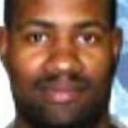

In [71]:
im =Image.open('27_0_1_20170102233552626.jpg.chip.jpg').resize((128,128))
im

In [72]:
onlyfiles = os.listdir()

In [73]:
len(onlyfiles)

#Enable Asian only
asian = []
for name in onlyfiles:
    race = name.split('_')[2]
    if race == '2':
        asian.append(name)
onlyfiles = asian

In [74]:
shuffle(onlyfiles)
age = [i.split('_')[0] for i in onlyfiles]

In [75]:
class_label = ['17-','18-24','25-34','35-44','45-60','60+']

classes = []
Y_age = []
for i in age:
    i = int(i)
    if i <= 17:
        classes.append(0)
    elif (i>17) and (i<=24):
        classes.append(1)
    elif (i>24) and (i<=34):
        classes.append(2)
    elif (i>34) and (i<=44):
        classes.append(3)
    elif (i>44) and (i<=60):
        classes.append(4)
    elif i>60:
        classes.append(5)
    Y_age.append(i)

In [84]:
import imageio

def convertImage(filename):
    face = imageio.imread(filename)
    face = cv2.resize(face, (32, 32))
    return face 
X_data = list(map(convertImage, onlyfiles))

[array([[[ 87,  45,  34],
        [ 84,  35,  21],
        [ 77,  34,  24],
        ...,
        [ 60,  33,  24],
        [ 61,  37,  27],
        [ 64,  42,  31]],

       [[ 75,  37,  26],
        [ 87,  42,  19],
        [ 91,  51,  27],
        ...,
        [ 60,  32,  24],
        [ 49,  25,  15],
        [ 66,  39,  30]],

       [[ 75,  39,  24],
        [ 90,  46,  32],
        [ 79,  40,  35],
        ...,
        [ 68,  41,  32],
        [ 50,  26,  17],
        [ 69,  40,  32]],

       ...,

       [[232, 225, 233],
        [236, 226, 235],
        [235, 225, 235],
        ...,
        [233, 226, 234],
        [233, 226, 234],
        [  1,   1,   1]],

       [[232, 225, 233],
        [234, 221, 231],
        [224, 207, 219],
        ...,
        [231, 224, 232],
        [231, 224, 232],
        [  0,   0,   0]],

       [[228, 224, 238],
        [233, 222, 239],
        [211, 184, 219],
        ...,
        [229, 223, 235],
        [230, 224, 238],
        [  0,   0,   0]

In [77]:
X = np.squeeze(X_data)

In [78]:
X.shape

(1553, 32, 32, 3)

In [79]:
X = X.astype('float32')
X /= 255

In [80]:
classes[:10]

[1, 0, 5, 0, 0, 3, 0, 0, 0, 0]

In [15]:
categorical_labels = to_categorical(classes, num_classes=6)

In [16]:
categorical_labels

array([[0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)

In [17]:
categorical_labels[:10]

array([[0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)

In [18]:
len(X)

1553

In [19]:
(x_train, y_train, y_train_age), (x_test, y_test, y_test_age) = (X[:1100],categorical_labels[:1100], Y_age[:1100]) , (X[1100:] , categorical_labels[1100:], Y_age[1100:])
#(x_valid , y_valid) = (x_test[1000:], y_test[1000:])
#(x_test, y_test) = (x_test[:1000], y_test[:1000])

In [20]:
len(x_train)+len(x_test)  == len(X)

True

In [21]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report

In [22]:
cv2.cvtColor(x_train[0], cv2.COLOR_BGR2GRAY).shape

(32, 32)

In [23]:
x_train_temp = np.array([cv2.cvtColor(x_t, cv2.COLOR_BGR2GRAY).flatten() for x_t in x_train]) 
x_train_temp.shape

(1100, 1024)

In [24]:
x_train_df = pd.DataFrame(x_train_temp)
x_train_df

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.401706,0.367929,0.353392,0.364431,0.418820,0.463745,0.479431,0.487275,0.492816,0.502961,...,0.328624,0.346165,0.345078,0.335514,0.331231,0.172176,0.147878,0.202737,0.261965,0.263820
1,0.867020,0.814267,0.741055,0.654604,0.537741,0.706859,0.756314,0.748192,0.719333,0.702686,...,0.403506,0.418298,0.585071,0.526008,0.517212,0.618306,0.586514,0.697878,0.819600,0.866682
2,0.596357,0.634914,0.688196,0.708741,0.745251,0.776455,0.792141,0.784298,0.782063,0.770635,...,0.907106,0.908000,0.903843,0.930333,0.969227,0.978816,0.992157,0.996078,0.992157,1.000000
3,0.339322,0.392816,0.409396,0.436078,0.418663,0.422584,0.418663,0.406898,0.406173,0.406173,...,0.082565,0.091329,0.554118,0.603522,0.760875,0.848682,0.810361,0.747212,0.664902,0.684063
4,0.511859,0.514482,0.446239,0.499031,0.506106,0.526482,0.550055,0.561416,0.568086,0.568941,...,0.670361,0.757125,0.255945,0.083584,0.392929,0.565784,0.618349,0.629816,0.645631,0.610145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0.954839,0.553169,0.274518,0.521871,0.507012,0.528965,0.591710,0.630926,0.676643,0.696126,...,0.488510,0.669694,0.739902,0.737710,0.897008,0.931239,0.925894,0.961467,0.977753,0.971443
1096,0.471957,0.392969,0.371094,0.327761,0.282000,0.295722,0.320102,0.359933,0.384227,0.442839,...,0.707137,0.697741,0.660227,0.609373,0.565318,0.499867,0.384565,0.311271,0.297929,0.298251
1097,0.121098,0.125576,0.114090,0.133867,0.199326,0.271416,0.298690,0.309965,0.360945,0.398388,...,0.504063,0.321447,0.352980,0.321800,0.208184,0.100682,0.120482,0.141263,0.144012,0.147933
1098,0.721533,0.724494,0.731075,0.756973,0.760894,0.772980,0.776902,0.784745,0.775839,0.775839,...,0.471933,0.463259,0.478804,0.522059,0.569929,0.607267,0.563467,0.523584,0.588314,0.862961


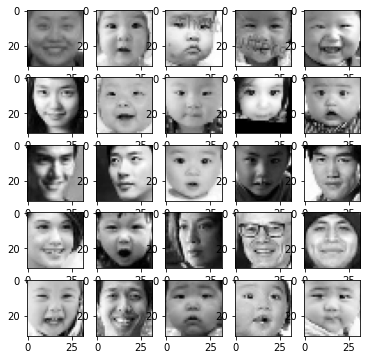

In [25]:
def plot_faces(pixels):
    fig, axes = plt.subplots(5, 5, figsize=(6, 6))
    for i, ax in enumerate(axes.flat):
        ax.imshow(np.array(pixels)[i].reshape(32, 32), cmap='gray')
    plt.show()
plot_faces(x_train_df)

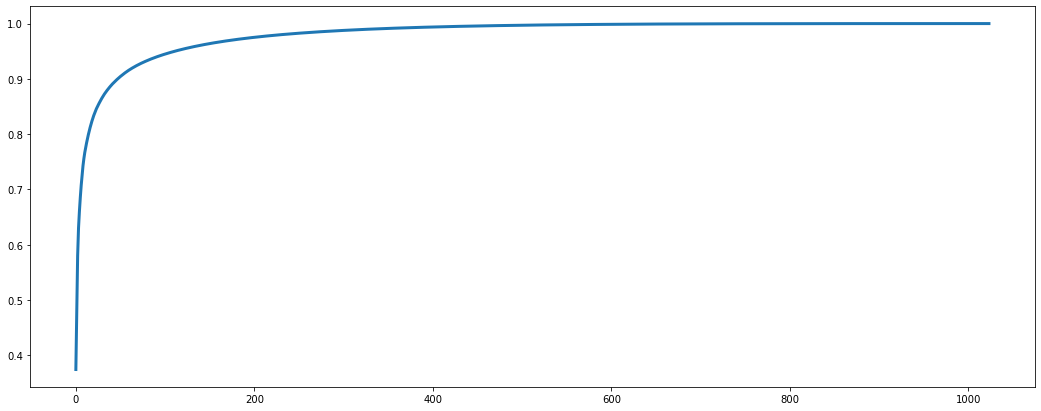

In [26]:
pca = PCA().fit(x_train_df)
plt.figure(figsize=(18, 7))
plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3)

In [27]:
representPercesntage = 0.999
np.where(pca.explained_variance_ratio_.cumsum() > representPercesntage)[0][0:10]

array([632, 633, 634, 635, 636, 637, 638, 639, 640, 641], dtype=int64)

In [28]:
n_com = np.where(pca.explained_variance_ratio_.cumsum() > representPercesntage)[0][0]

In [29]:
pca = PCA(n_components=n_com).fit(x_train_df)

In [30]:
x_train_pca = pca.transform(x_train_df)

In [31]:
x_train_pca.shape

(1100, 632)

In [32]:
y_train_sklearn = np.array([np.where(yt == 1)[0][0] for yt in y_train])

In [33]:
y_train_sklearn

array([3, 0, 0, ..., 0, 0, 1], dtype=int64)

In [34]:
classifier = SVC().fit(x_train_pca,y_train_sklearn)

In [35]:
predictions = classifier.predict(x_train_pca)
target_names = [str(l) for l in range(6)]
print(classification_report(y_train_sklearn, predictions, target_names=target_names))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       701
           1       0.94      0.54      0.69        87
           2       0.75      0.67      0.71       128
           3       0.77      0.57      0.65        65
           4       1.00      0.02      0.05        43
           5       0.96      0.68      0.80        76

    accuracy                           0.84      1100
   macro avg       0.88      0.58      0.63      1100
weighted avg       0.85      0.84      0.81      1100



In [36]:
TruePrediction = 0
for i in range(len(predictions)):
    if predictions[i] == y_train_sklearn[i]:
        TruePrediction += 1
print(f"Accuracy: {TruePrediction/len(predictions)}")

Accuracy: 0.8354545454545454


In [37]:
x_test_temp = np.array([cv2.cvtColor(x_t, cv2.COLOR_BGR2GRAY).flatten() for x_t in x_test]) 
x_test_df = pd.DataFrame(x_test_temp)
x_test_pca = pca.transform(x_test_df)

predictions = classifier.predict(x_test_pca)

y_test_sklearn = np.array([np.where(yt == 1)[0][0] for yt in y_test])

print(classification_report(y_test_sklearn, predictions))

              precision    recall  f1-score   support

           0       0.72      0.96      0.83       277
           1       0.38      0.08      0.13        38
           2       0.47      0.33      0.39        70
           3       0.21      0.15      0.18        26
           4       0.00      0.00      0.00        19
           5       0.57      0.17      0.27        23

    accuracy                           0.66       453
   macro avg       0.39      0.28      0.30       453
weighted avg       0.59      0.66      0.60       453



C:\Users\Aziz\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aziz\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aziz\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
TruePrediction = 0
loss = 0
N = len(predictions)
for i in range(len(predictions)):
    if predictions[i] == y_test_sklearn[i]:
        TruePrediction += 1
    else:
        loss += (y_test_sklearn[i] - predictions[i])**2
print(f"Accuracy: {TruePrediction/len(predictions)}")
print(f"Loss: {(loss/N)**0.5}")

Accuracy: 0.6644591611479028
Loss: 1.486510351219446


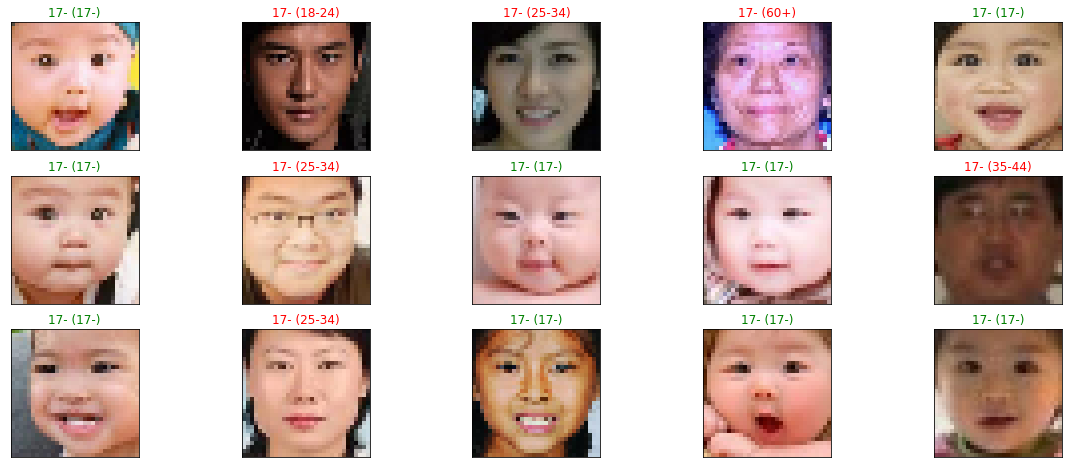

In [83]:
labels = class_label

figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = predictions[index]
    true_index = np.argmax(y_test[index])
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       277
           1       0.25      0.26      0.26        38
           2       0.39      0.34      0.36        70
           3       0.23      0.31      0.26        26
           4       0.23      0.16      0.19        19
           5       0.72      0.57      0.63        23

    accuracy                           0.69       453
   macro avg       0.45      0.43      0.43       453
weighted avg       0.69      0.69      0.69       453

Accuracy: 0.6887417218543046
Loss: 1.0836941155060038


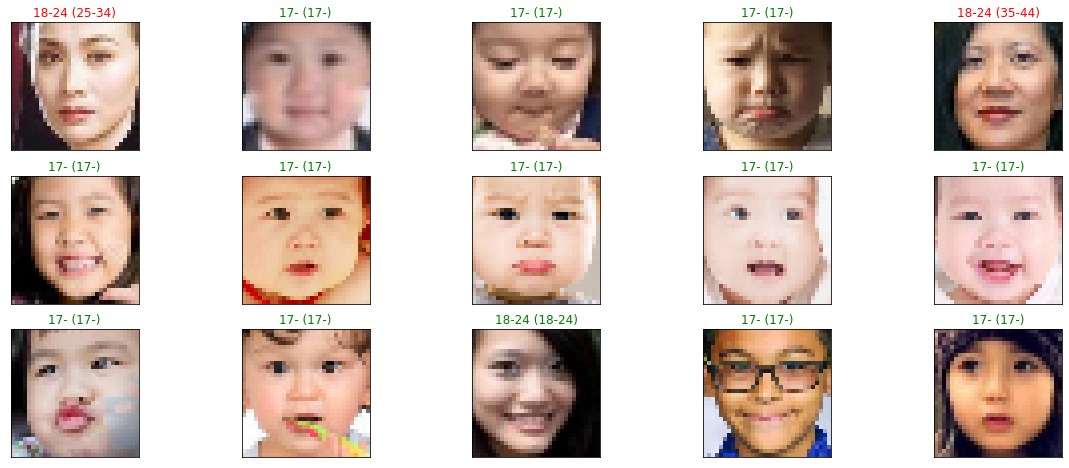

In [40]:
#SVM linear

classifier = SVC(kernel = 'linear').fit(x_train_pca,y_train_sklearn)
# Preprocessing pipeline
x_test_temp = np.array([cv2.cvtColor(x_t, cv2.COLOR_BGR2GRAY).flatten() for x_t in x_test]) 
x_test_df = pd.DataFrame(x_test_temp)
x_test_pca = pca.transform(x_test_df)

predictions = classifier.predict(x_test_pca)

y_test_sklearn = np.array([np.where(yt == 1)[0][0] for yt in y_test])

print(classification_report(y_test_sklearn, predictions))

TruePrediction = 0
loss = 0
N = len(predictions)
for i in range(N):
    if predictions[i] == y_test_sklearn[i]:
        TruePrediction += 1
    else:
        loss += (y_test_sklearn[i] - predictions[i])**2
print(f"Accuracy: {TruePrediction/len(predictions)}")
print(f"Loss: {(loss/N)**0.5}")

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = predictions[index]
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()

C:\Users\Aziz\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aziz\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aziz\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       277
           1       0.00      0.00      0.00        38
           2       0.00      0.00      0.00        70
           3       0.00      0.00      0.00        26
           4       0.00      0.00      0.00        19
           5       0.05      1.00      0.10        23

    accuracy                           0.05       453
   macro avg       0.01      0.17      0.02       453
weighted avg       0.00      0.05      0.00       453

Accuracy: 0.05077262693156733
Loss: 4.276843547346199


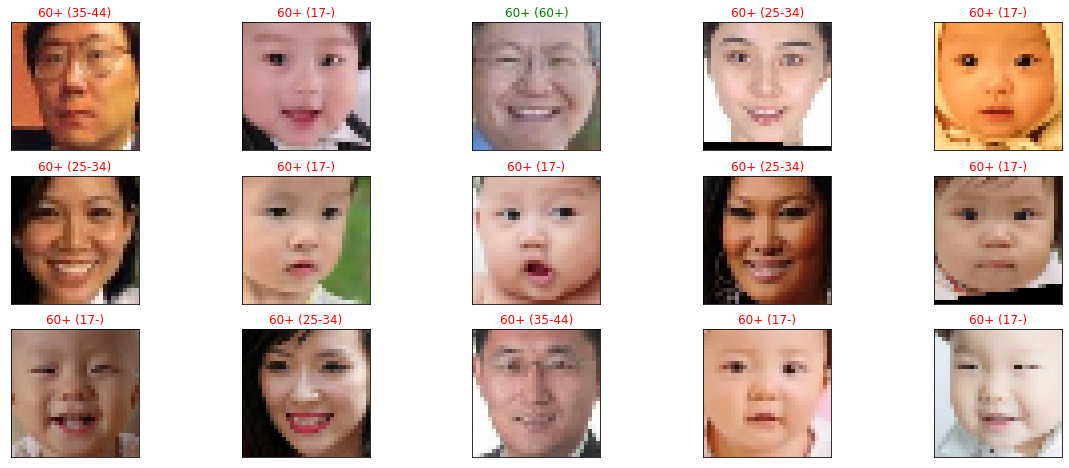

In [41]:
#SVM poly

classifier = SVC(kernel = 'poly', gamma='auto', class_weight='balanced').fit(x_train_pca,y_train_sklearn)
# Preprocessing pipeline
x_test_temp = np.array([cv2.cvtColor(x_t, cv2.COLOR_BGR2GRAY).flatten() for x_t in x_test]) 
x_test_df = pd.DataFrame(x_test_temp)
x_test_pca = pca.transform(x_test_df)

predictions = classifier.predict(x_test_pca)

y_test_sklearn = np.array([np.where(yt == 1)[0][0] for yt in y_test])

print(classification_report(y_test_sklearn, predictions))

TruePrediction = 0
loss = 0
N = len(predictions)
for i in range(N):
    if predictions[i] == y_test_sklearn[i]:
        TruePrediction += 1
    else:
        loss += (y_test_sklearn[i] - predictions[i])**2
print(f"Accuracy: {TruePrediction/len(predictions)}")
print(f"Loss: {(loss/N)**0.5}")


# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = predictions[index]
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()

In [42]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=6, random_state=2).fit(x_train_pca)
kmeans.labels_

array([3, 1, 1, ..., 3, 5, 2])

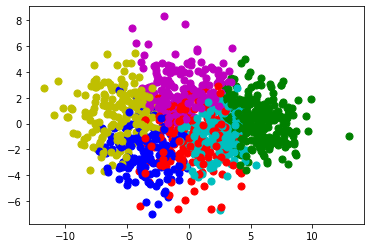

In [43]:
results = {
    i:[] for i in range(6)
}

colors = ['r','g','b','y','m','c']
for i in range(len(x_train_pca)):
    pc1, pc2 = x_train_pca[i][0:2]
    label = kmeans.labels_[i]
    results[label].append(y_train_sklearn[i])
    plt.scatter(pc1, pc2, c= colors[label],
            s=50, cmap='viridis');

In [44]:
from collections import Counter
sumCounter = Counter()
for k,v in results.items():
    print(f"Label {k}")
    print(Counter(v))
    sumCounter += Counter(v)

Label 0
Counter({0: 93, 1: 17, 2: 15, 3: 12, 4: 12, 5: 8})
Label 1
Counter({0: 228, 2: 7, 5: 4, 1: 4, 4: 1})
Label 2
Counter({0: 46, 2: 45, 1: 35, 3: 12, 5: 9, 4: 5})
Label 3
Counter({0: 76, 5: 32, 2: 29, 3: 25, 4: 14, 1: 14})
Label 4
Counter({0: 120, 2: 24, 5: 16, 3: 13, 4: 7, 1: 5})
Label 5
Counter({0: 138, 1: 12, 2: 8, 5: 7, 4: 4, 3: 3})


In [45]:
sumCounter

Counter({1: 87, 3: 65, 0: 701, 4: 43, 2: 128, 5: 76})

In [46]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x_train_pca, y_train_age)
reg.score(x_train_pca, y_train_age)

predictions = reg.predict(x_train_pca)

accuracy = 0
for i in range(len(predictions)):
    print(f"Prediction: {predictions[i]}")
    print(f"Real: {y_train_age[i]}")
    
    if predictions[i] <= 17:
        Class = 0
    elif (predictions[i]>17) and (predictions[i]<=24):
        Class = 1
    elif (predictions[i]>24) and (predictions[i]<=34):
        Class = 2
    elif (predictions[i]>34) and (predictions[i]<=44):
        Class = 3
    elif (predictions[i]>44) and (predictions[i]<=60):
        Class = 4
    elif predictions[i]>60:
        Class = 5
    if Class == y_train_sklearn[i]:
        accuracy += 1
accuracy /= len(predictions)
print(f"Train accuracy {accuracy}")

predictions = reg.predict(x_test_pca)
predictions_class = []
accuracy = 0
for i in range(len(predictions)):
    print(f"Prediction: {predictions[i]}")
    print(f"Real: {y_test_age[i]}")
    
    if predictions[i] <= 17:
        Class = 0
    elif (predictions[i]>17) and (predictions[i]<=24):
        Class = 1
    elif (predictions[i]>24) and (predictions[i]<=34):
        Class = 2
    elif (predictions[i]>34) and (predictions[i]<=44):
        Class = 3
    elif (predictions[i]>44) and (predictions[i]<=60):
        Class = 4
    elif predictions[i]>60:
        Class = 5
    if Class == y_test_sklearn[i]:
        accuracy += 1
    predictions_class.append(Class)
accuracy /= len(predictions)
print(f"Test accuracy {accuracy}")

Prediction: 28.50629234313965
Real: 37
Prediction: 15.316431999206543
Real: 2
Prediction: -4.751157760620117
Real: 1
Prediction: 0.1802806854248047
Real: 1
Prediction: -2.833864212036133
Real: 1
Prediction: 24.589513778686523
Real: 24
Prediction: -6.345968246459961
Real: 1
Prediction: 5.295909881591797
Real: 2
Prediction: -0.8583946228027344
Real: 4
Prediction: -1.4756221771240234
Real: 1
Prediction: 31.059673309326172
Real: 26
Prediction: 28.138729095458984
Real: 25
Prediction: -4.684755325317383
Real: 1
Prediction: 13.399788856506348
Real: 5
Prediction: 29.725265502929688
Real: 24
Prediction: 23.0360107421875
Real: 23
Prediction: 6.937597274780273
Real: 3
Prediction: 36.901153564453125
Real: 32
Prediction: 62.65238952636719
Real: 62
Prediction: 39.863468170166016
Real: 33
Prediction: -0.6340961456298828
Real: 3
Prediction: 32.13746643066406
Real: 36
Prediction: -5.583513259887695
Real: 3
Prediction: 7.6927385330200195
Real: 2
Prediction: -10.99091911315918
Real: 2
Prediction: 0.29320

Prediction: 6.954744338989258
Real: 3
Prediction: 0.27737998962402344
Real: 1
Prediction: 24.855796813964844
Real: 25
Prediction: -5.791727066040039
Real: 1
Prediction: 33.419837951660156
Real: 29
Prediction: 22.02044677734375
Real: 21
Prediction: 8.149919509887695
Real: 3
Prediction: 20.957645416259766
Real: 26
Prediction: 29.168331146240234
Real: 22
Prediction: 7.598297119140625
Real: 4
Prediction: 0.46240806579589844
Real: 5
Prediction: 20.02484893798828
Real: 21
Prediction: 53.53356170654297
Real: 51
Prediction: 1.6430349349975586
Real: 2
Prediction: 8.579347610473633
Real: 1
Prediction: -5.59681510925293
Real: 1
Prediction: -14.353155136108398
Real: 2
Prediction: -1.9886188507080078
Real: 1
Prediction: 25.161235809326172
Real: 29
Prediction: -6.218721389770508
Real: 1
Prediction: -6.350503921508789
Real: 2
Prediction: -16.65401268005371
Real: 5
Prediction: -6.4261627197265625
Real: 4
Prediction: -5.200830459594727
Real: 2
Prediction: 48.13602828979492
Real: 56
Prediction: 19.88888

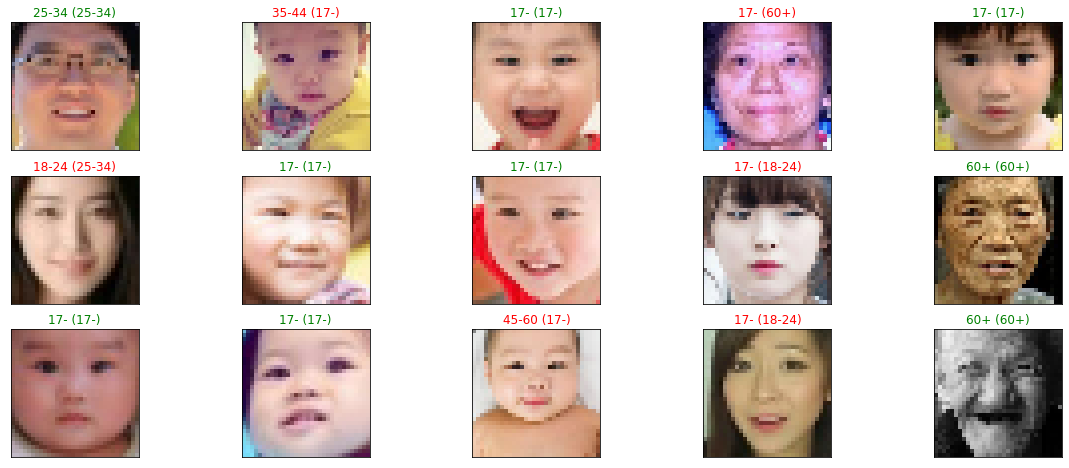

In [47]:
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = predictions_class[index]
    true_index = np.argmax(y_test[index])
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [49]:
clf = RandomForestClassifier(max_depth=100, random_state=100)
clf.fit(x_train_pca, y_train_sklearn)

RandomForestClassifier(max_depth=100, random_state=100)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       701
           1       1.00      1.00      1.00        87
           2       1.00      1.00      1.00       128
           3       1.00      1.00      1.00        65
           4       1.00      1.00      1.00        43
           5       1.00      1.00      1.00        76

    accuracy                           1.00      1100
   macro avg       1.00      1.00      1.00      1100
weighted avg       1.00      1.00      1.00      1100

Accuracy: 1.0
Loss: 0.0
              precision    recall  f1-score   support

           0       0.62      0.99      0.76       277
           1       0.00      0.00      0.00        38
           2       0.40      0.06      0.10        70
           3       0.00      0.00      0.00        26
           4       0.00      0.00      0.00        19
           5       0.50      0.04      0.08        23

    accuracy                           0.61       453

C:\Users\Aziz\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aziz\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aziz\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


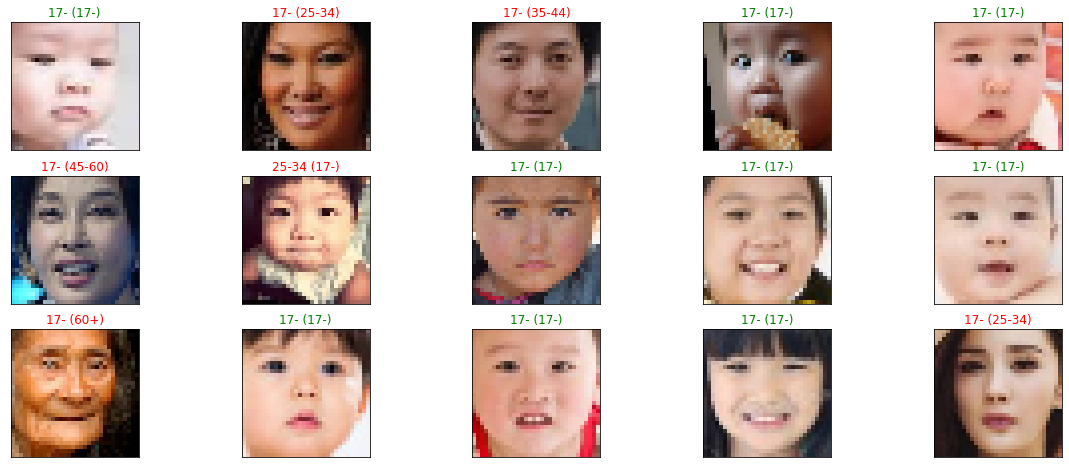

In [50]:
predictions = clf.predict(x_train_pca)
print(classification_report(y_train_sklearn, predictions))

TruePrediction = 0
loss = 0
N = len(predictions)
for i in range(N):
    if predictions[i] == y_train_sklearn[i]:
        TruePrediction += 1
    else:
        loss += (y_train_sklearn[i] - predictions[i])**2
print(f"Accuracy: {TruePrediction/len(predictions)}")
print(f"Loss: {(loss/N)**0.5}")

predictions = clf.predict(x_test_pca)
print(classification_report(y_test_sklearn, predictions))


TruePrediction = 0
loss = 0
N = len(predictions)
for i in range(N):
    if predictions[i] == y_test_sklearn[i]:
        TruePrediction += 1
    else:
        loss += (y_test_sklearn[i] - predictions[i])**2
print(f"Accuracy: {TruePrediction/len(predictions)}")
print(f"Loss: {(loss/N)**0.5}")

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = predictions[index]
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()

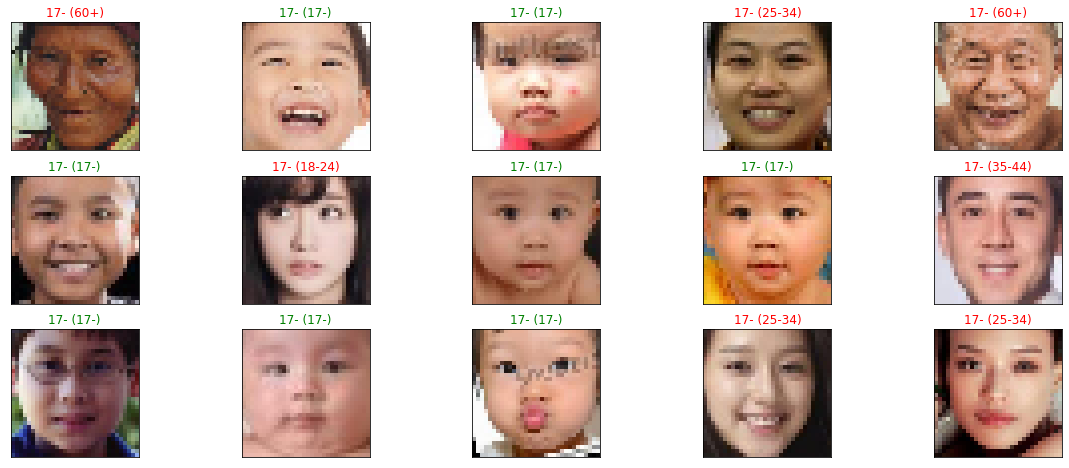

In [51]:
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = predictions[index]
    true_index = np.argmax(y_test[index])
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()

*******************************************************************************************************************************